In [1]:
%matplotlib widget

## Extract features

In [2]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

In [3]:
# Enter path to CSV file
path = "./datasets/fish-5-cleaned.csv"

data = mkit.read_data(path)
data.head()

,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,390.33,405.89
3,1,811,445.15,411.94
4,1,905,366.06,451.76


In [7]:
data_features = mkit.extract_features(data, fps = 10)
data_features.head(100)

c:\users\manuel\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2197: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,turning
0,1,312,405.29,417.76,0.000000,0.210217,-0.018039,0.000000,1,0.000000
1,2,312,405.31,417.37,0.390512,0.192177,-0.018039,0.000491,1,0.000491
2,3,312,405.31,417.07,0.300000,0.174723,-0.018039,0.000359,1,-0.000132
3,4,312,405.30,416.86,0.210238,0.159133,-0.018039,0.000239,1,-0.000120
4,5,312,405.29,416.71,0.150333,0.155506,-0.018039,0.000168,1,-0.000072
...,...,...,...,...,...,...,...,...,...,...
95,96,312,409.55,408.84,0.130384,0.097606,0.003604,0.000171,1,0.000024
96,97,312,409.62,408.79,0.086023,0.112565,-0.000617,0.000147,1,-0.000024
97,98,312,409.62,408.69,0.100000,0.130374,0.003597,0.000122,1,-0.000024
98,99,312,409.70,408.55,0.161245,0.144838,0.009800,0.000269,1,0.000147


__Plotting the data__

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
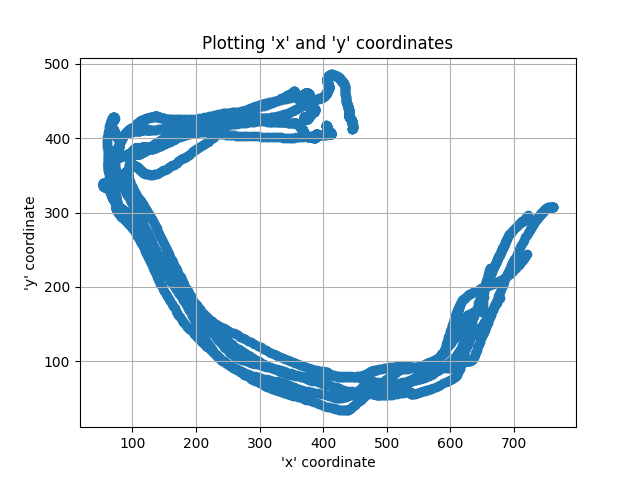

In [16]:
# plot movement 
mkit.plot_movement(data, frm=0, to=1000)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
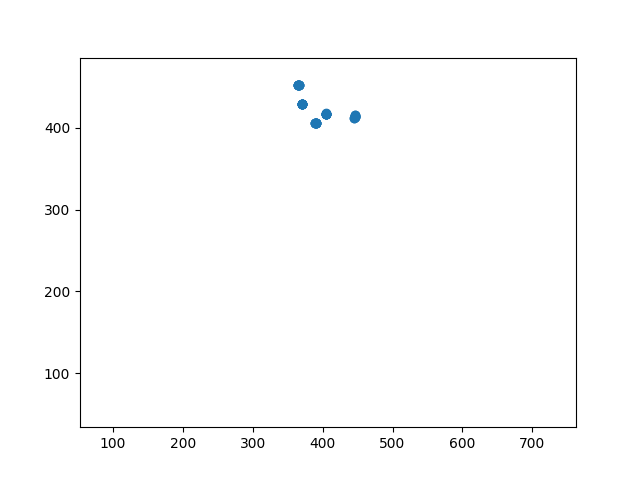

In [17]:
# animate the data
anim = mkit.animate_movement(data, 10)
writergif = animation.PillowWriter(fps=30) 
anim.save('mover.gif', writer=writergif)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
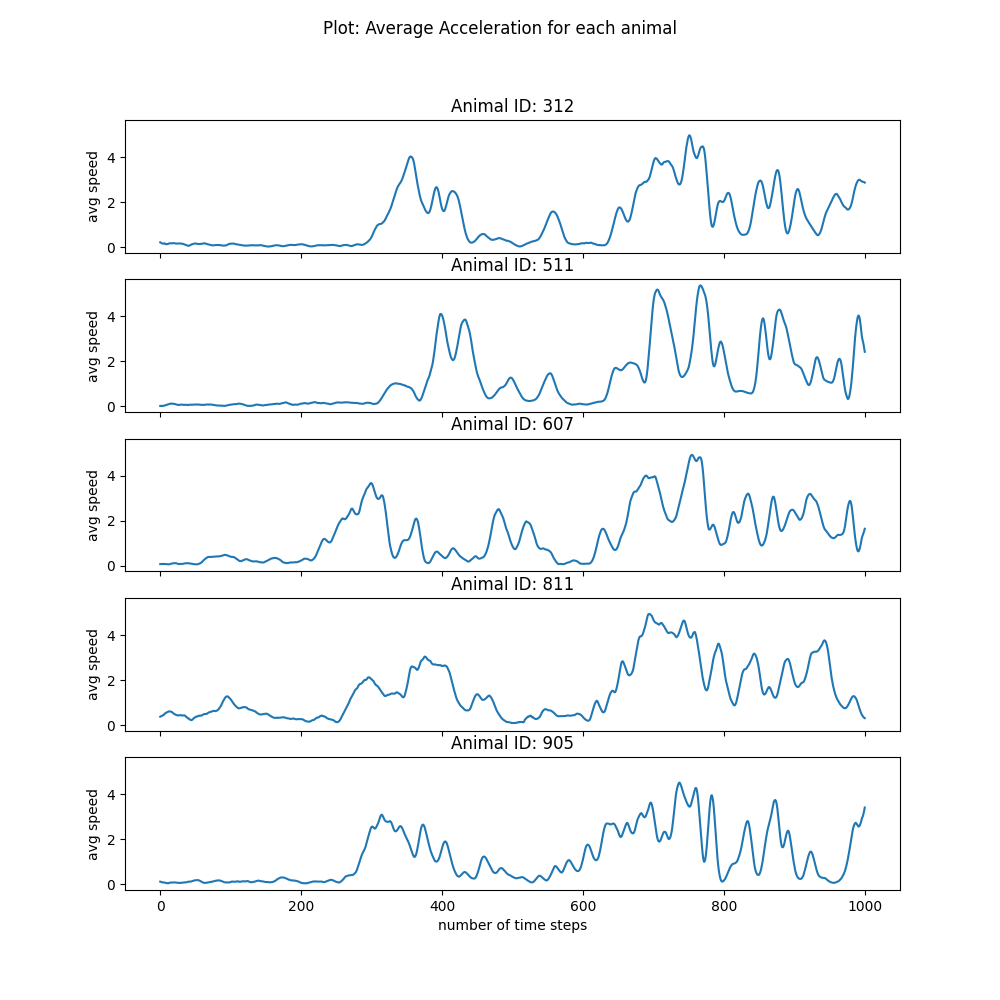

In [18]:
mkit.plot_pace(data_features, "speed")


Area (polygon) covered by animal ID = 312 is = 139873.97 sq. units


Area (polygon) covered by animal ID = 511 is = 151556.80 sq. units


Area (polygon) covered by animal ID = 607 is = 171971.54 sq. units


Area (polygon) covered by animal ID = 811 is = 196394.24 sq. units


Area (polygon) covered by animal ID = 905 is = 151805.74 sq. units


Area (polygon) covered by animals collectively is =  214704.49029999992 sq. units


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
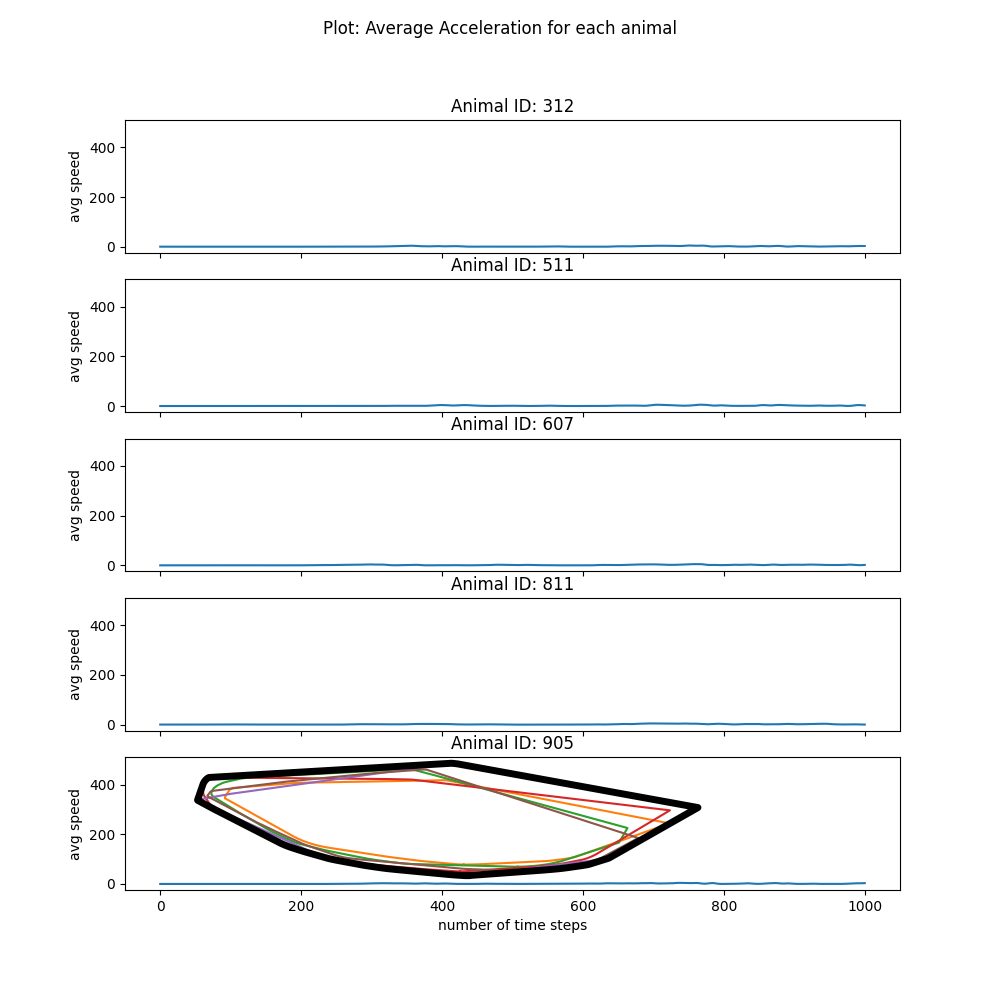

In [19]:
mkit.explore_features_geospatial(data)

## Time series analysis

Possible parameters to extract time series features are: 

- *absolute_sum_of_changes(x)*	Returns the sum over the absolute value of consecutive changes in the series x
- *agg_autocorrelation(x, param)*	Calculates the value of an aggregation function f_{agg} 
- *agg_linear_trend(x, param)*	Calculates a linear least-squares regression for values of the time series that were aggregated over chunks versus the sequence from 0 up to the number of chunks minus one.
- *approximate_entropy(x, m, r)*	Implements a vectorized Approximate entropy algorithm.
- *ar_coefficient(x, param)*	This feature calculator fits the unconditional maximum likelihood of an autoregressive AR(k) process.
- *augmented_dickey_fuller(x, param)*	The Augmented Dickey-Fuller test is a hypothesis test which checks whether a unit root is present in a time series sample.
- *autocorrelation(x, lag)*	Calculates the autocorrelation of the specified lag, according to the formula [1]
- *has_duplicate(x)*	Checks if any value in x occurs more than once
- *kurtosis(x)*	Returns the kurtosis of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G2).
- *large_standard_deviation(x, r)*	Boolean variable denoting if the standard dev of x is higher than ‘r’ times the range = difference between max and min of x.
- *last_location_of_maximum(x)*	Returns the relative last location of the maximum value of x.
- *length(x)*	Returns the length of x
- *linear_trend(x, param)*	Calculate a linear least-squares regression for the values of the time series versus the sequence from 0 to length of the time series minus one.
- *maximum(x)*	Calculates the highest value of the time series x.
- *mean(x)*	Returns the mean of x
- *median(x)*	Returns the median of x
- *minimum(x)*	Calculates the lowest value of the time series x.
- *number_crossing_m(x, m)*	Calculates the number of crossings of x on m.
- *number_cwt_peaks(x, n)*	This feature calculator searches for different peaks in x.
- *number_peaks(x, n)*	Calculates the number of peaks of at least support n in the time series x.
- *partial_autocorrelation(x, param)*	Calculates the value of the partial autocorrelation function at the given lag.
- *quantile(x, q)*	Calculates the q quantile of x.
- *range_count(x, min, max)*	Count observed values within the interval [min, max].
- *sample_entropy(x)*	Calculate and return sample entropy of x.
- *set_property(key, value)*	This method returns a decorator that sets the property key of the function to value
- *skewness(x)*	Returns the sample skewness of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G1).
- *standard_deviation(x)*	Returns the standard deviation of x
- *sum_of_reoccurring_data_points(x)*	Returns the sum of all data points, that are present in the time series more than once.
- *sum_of_reoccurring_values(x)*	Returns the sum of all values, that are present in the time series more than once.
- *sum_values(x)*	Calculates the sum over the time series values
- *value_count(x, value)*	Count occurrences of value in time series x.
- *variance(x)*	Returns the variance of x

In [20]:
# For example autocorrelation 
auto_corr = mkit.ts_feature(data_features, 'autocorrelation')
auto_corr

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.65it/s]


,average_acceleration__autocorrelation__lag_0,average_acceleration__autocorrelation__lag_1,average_acceleration__autocorrelation__lag_2,average_acceleration__autocorrelation__lag_3,average_acceleration__autocorrelation__lag_4,average_acceleration__autocorrelation__lag_5,average_acceleration__autocorrelation__lag_6,average_acceleration__autocorrelation__lag_7,average_acceleration__autocorrelation__lag_8,average_acceleration__autocorrelation__lag_9,...,y__autocorrelation__lag_0,y__autocorrelation__lag_1,y__autocorrelation__lag_2,y__autocorrelation__lag_3,y__autocorrelation__lag_4,y__autocorrelation__lag_5,y__autocorrelation__lag_6,y__autocorrelation__lag_7,y__autocorrelation__lag_8,y__autocorrelation__lag_9
312,1.0,0.973668,0.903444,0.794881,0.657631,0.500651,0.332216,0.163979,0.004965,-0.134738,...,1.0,1.000433,1.000799,1.001097,1.001328,1.001492,1.001589,1.001619,1.001585,1.001487
511,1.0,0.972424,0.903822,0.801623,0.675507,0.533283,0.382753,0.232857,0.090447,-0.036410,...,1.0,1.000432,1.000795,1.001090,1.001316,1.001472,1.001556,1.001568,1.001507,1.001375
607,1.0,0.968219,0.889871,0.775182,0.637952,0.490478,0.339138,0.194008,0.063611,-0.042827,...,1.0,1.000653,1.001235,1.001747,1.002191,1.002566,1.002874,1.003116,1.003293,1.003406
811,1.0,0.959034,0.876176,0.763834,0.635188,0.503375,0.365420,0.227693,0.100381,-0.008999,...,1.0,1.000724,1.001366,1.001928,1.002409,1.002810,1.003132,1.003375,1.003540,1.003628
905,1.0,0.964907,0.870206,0.726151,0.547323,0.349837,0.148240,-0.042027,-0.207605,-0.338054,...,1.0,1.000210,1.000370,1.000482,1.000546,1.000563,1.000537,1.000469,1.000361,1.000215


__Extract all possible time series features__ 

In [21]:
ts_features = mkit.ts_all_features(data_features)
ts_features

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 9/9 [00:30<00:00,  3.41s/it]
c:\users\manuel\appdata\local\programs\python\python38\lib\site-packages\tsfresh\utilities\dataframe_functions.py:171: RuntimeWarning: The columns ['turning__query_similarity_count__query_None__threshold_0.0'
 'x__query_similarity_count__query_None__threshold_0.0'
 'y__query_similarity_count__query_None__threshold_0.0'
 'average_acceleration__query_similarity_count__query_None__threshold_0.0'
 'average_speed__query_similarity_count__query_None__threshold_0.0'
 'direction__query_similarity_count__query_None__threshold_0.0'
 'distance__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


,turning__variance_larger_than_standard_deviation,turning__has_duplicate_max,turning__has_duplicate_min,turning__has_duplicate,turning__sum_values,turning__abs_energy,turning__mean_abs_change,turning__mean_change,turning__mean_second_derivative_central,turning__median,...,distance__permutation_entropy__dimension_5__tau_1,distance__permutation_entropy__dimension_6__tau_1,distance__permutation_entropy__dimension_7__tau_1,distance__query_similarity_count__query_None__threshold_0.0,"distance__matrix_profile__feature_""min""__threshold_0.98","distance__matrix_profile__feature_""max""__threshold_0.98","distance__matrix_profile__feature_""mean""__threshold_0.98","distance__matrix_profile__feature_""median""__threshold_0.98","distance__matrix_profile__feature_""25""__threshold_0.98","distance__matrix_profile__feature_""75""__threshold_0.98"
312,0.0,0.0,0.0,1.0,0.001955,0.000044,0.000124,5.491732e-09,-2.646510e-07,0.000004,...,3.656071,4.552744,5.153861,0.0,2.424424,10.368385,6.428906,6.061785,4.893105,8.329089
511,0.0,0.0,0.0,1.0,0.001856,0.000080,0.000129,-1.867557e-07,4.644715e-09,0.000002,...,3.625807,4.550446,5.160369,0.0,1.608737,9.560575,4.402903,3.702528,2.593091,6.365235
607,0.0,0.0,0.0,0.0,0.001110,0.000059,0.000150,1.127220e-07,-5.928628e-08,0.000001,...,3.392675,4.250439,4.918822,0.0,1.803152,8.261652,3.685940,3.680112,2.786459,4.417432
811,0.0,0.0,0.0,0.0,0.000191,0.000075,0.000181,7.243056e-08,3.656827e-08,-0.000004,...,3.871311,4.871424,5.586094,0.0,1.525412,7.275725,3.918884,3.886348,3.085988,4.900854
905,0.0,0.0,0.0,0.0,0.003525,0.000066,0.000135,2.477487e-07,-4.293020e-08,-0.000003,...,3.395625,4.235639,4.863876,0.0,1.529394,8.000601,4.259319,4.081086,3.478502,4.963320


### Compute the Euclidean distance

Return the normalized Euclidean distance between movers for each time step



In [24]:
distance = mkit.euclidean_dist(data_features)
distance.head(10)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,turning,312,511,607,811,905
0,1,312,405.29,417.76,0.000000,0.210217,-0.018039,0.000000,1,0.000000,0.000000,0.055401,0.033672,0.057634,0.093339
1000,1,511,369.99,428.78,0.000000,0.020944,0.000236,0.000000,1,0.000000,0.055401,0.000000,0.058181,0.112287,0.051128
2000,1,607,390.33,405.89,0.000000,0.070235,0.004961,0.000000,1,0.000000,0.033672,0.058181,0.000000,0.078413,0.107066
3000,1,811,445.15,411.94,0.000000,0.370500,0.017482,0.000000,1,0.000000,0.057634,0.112287,0.078413,0.000000,0.142064
4000,1,905,366.06,451.76,0.000000,0.118000,-0.006333,0.000000,1,0.000000,0.093339,0.051128,0.107066,0.142064,0.000000
1,2,312,405.31,417.37,0.390512,0.192177,-0.018039,0.000491,1,0.000491,0.000000,0.055826,0.033094,0.057732,0.094218
1001,2,511,370.01,428.82,0.044721,0.021180,0.000236,0.000019,1,0.000019,0.055826,0.000000,0.058189,0.112496,0.051075
2001,2,607,390.25,405.89,0.080000,0.075196,0.004961,0.000102,1,0.000102,0.033094,0.058189,0.000000,0.079105,0.107121
3001,2,811,445.48,412.26,0.459674,0.387983,0.017482,0.000018,1,0.000018,0.057732,0.112496,0.079105,0.000000,0.142215
4001,2,905,365.86,451.76,0.200000,0.111667,-0.006333,0.000267,1,0.000267,0.094218,0.051075,0.107121,0.142215,0.000000


### Compute the distance covered by movers

Compute the distance between positions for a particular time window for all movers

In [23]:
mkit.distance_by_time(data,frm = 1, to = 10)

,animal_id,distance
0,312,1.521620
1,511,0.292302
2,607,0.727097
3,811,4.415353
4,905,0.793852


### Save to disk

In [ ]:
# save features to csv 
data_features.to_csv("datasets/fish-5-features.csv", index=False)

# with euclidean distance 
# distance.to_csv("fish-5-features.csv", index=False)

In [ ]:
# export the time series data 
#ts_features.to_json("fish-5-time-series.json")